# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`


import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject



# Read and clean data

Import your data, either through an API or manually, and load it. 

In [2]:
fert = DstApi('FERT1')
gdp = DstApi('NAN1')
fpi = DstApi ('PRIS112')

We have found our desired variables now it is time to clean the data

In [3]:
tabsum_fert= fert.tablesummary(language='en')
display(tabsum_fert)


Table FERT1: Total fertility rate (ages 15-49) by ancestry and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HERKOMST,6,AK,All women,DKK,Women of Danish origin,False
1,Tid,38,1986,1986,2023,2023,True


In [4]:
# The available values for a each variable: 
for variable in tabsum_fert['variable name']:
    print(variable+':')
    display(fert.variable_levels(variable, language='en'))

HERKOMST:


,id,text
0,AK,All women
1,IKV,Immigrant women from western countries
2,IKIV,Immigrant women from non-western countries
3,EKV,Descendant women from western countries
4,EKIV,Descendant women from non-western countries
5,DKK,Women of Danish origin


Tid:


,id,text
0,1986,1986
1,1987,1987
2,1988,1988
3,1989,1989
4,1990,1990
5,1991,1991
6,1992,1992
7,1993,1993
8,1994,1994
9,1995,1995


In [5]:
tabsum_gdp= gdp.tablesummary(language='en')
display(tabsum_gdp)
for var in tabsum_gdp['variable name']:
    print(var+':')
    display(gdp.variable_levels(var, language='en'))


Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-03-27T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LAN_C,"Pr. capita, 2010-prices, chained values, (1000...",False
2,Tid,58,1966,1966,2023,2023,True


TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2010-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


In [ ]:
tabsum_fpi= fpi.tablesummary(language='en')
display(tabsum_fpi)
for var in tabsum_fpi['variable name']:
    print(var+':')
    display(fpi.variable_levels(var, language='en'))


Now we have a quick overview of the avaible datapoints

In [6]:
params = fert.define_base_params(language='en')
params

{'table': 'fert1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HERKOMST', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [7]:
params ={'table': 'fert1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HERKOMST', 'values': ['AK']},
  {'code': 'Tid', 'values': ['>2008<=2023']}]}

In [8]:
fert_api = fert.get_data(params=params)
fert_api.head(15)

,HERKOMST,TID,INDHOLD
0,All women,2009,1839.6
1,All women,2010,1871.2
2,All women,2011,1752.4
3,All women,2012,1729.2
4,All women,2013,1668.7
5,All women,2014,1691.2
6,All women,2015,1713.6
7,All women,2016,1785.4
8,All women,2017,1751.9
9,All women,2018,1729.7


In [9]:
params = gdp.define_base_params(language='en')
params

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [10]:
params ={'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['B1GQK']},
  {'code': 'PRISENHED', 'values': ['V_M']},
  {'code': 'Tid', 'values': ['>2008<=2023']}]}

In [11]:
gdp_api = gdp.get_data(params=params)
gdp_api.head(15)

,TRANSAKT,PRISENHED,TID,INDHOLD
0,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2009,1722.1
1,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2010,1810.9
2,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2011,1846.9
3,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2012,1895.0
4,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2013,1929.7
5,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2014,1981.2
6,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2015,2036.4
7,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2016,2107.8
8,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2017,2193.0
9,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2018,2253.3


In [ ]:
params = fpi.define_base_params(language='en')
params

In [ ]:
params = {'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['1005']},
  {'code': 'Tid', 'values': ['>2008<=2023']}]}

In [ ]:
inc_api = fpi.get_data(params=params)
inc_api.head(15)

## Merging


In [12]:
merged = pd.merge(fert_api, gdp_api, on='TID', how='inner')
print(merged)  


     HERKOMST   TID INDHOLD_x                      TRANSAKT  \
0   All women  2009    1839.6  B.1*g Gross domestic product   
1   All women  2010    1871.2  B.1*g Gross domestic product   
2   All women  2011    1752.4  B.1*g Gross domestic product   
3   All women  2012    1729.2  B.1*g Gross domestic product   
4   All women  2013    1668.7  B.1*g Gross domestic product   
5   All women  2014    1691.2  B.1*g Gross domestic product   
6   All women  2015    1713.6  B.1*g Gross domestic product   
7   All women  2016    1785.4  B.1*g Gross domestic product   
8   All women  2017    1751.9  B.1*g Gross domestic product   
9   All women  2018    1729.7  B.1*g Gross domestic product   
10  All women  2019    1699.4  B.1*g Gross domestic product   
11  All women  2020    1674.7  B.1*g Gross domestic product   
12  All women  2021    1724.1  B.1*g Gross domestic product   
13  All women  2022    1552.9  B.1*g Gross domestic product   
14  All women  2023    1495.9  B.1*g Gross domestic pro

In [17]:
final_df = merged[['TID', 'INDHOLD_x', 'INDHOLD_y']].rename(columns={
    'INDHOLD_x': 'Fertility_Rate',
    'INDHOLD_y': 'GDP_Current_Prices'
})

# Print the final DataFrame with selected and renamed columns
print(final_df)




     TID Fertility_Rate GDP_Current_Prices
0   2009         1839.6             1722.1
1   2010         1871.2             1810.9
2   2011         1752.4             1846.9
3   2012         1729.2             1895.0
4   2013         1668.7             1929.7
5   2014         1691.2             1981.2
6   2015         1713.6             2036.4
7   2016         1785.4             2107.8
8   2017         1751.9             2193.0
9   2018         1729.7             2253.3
10  2019         1699.4             2311.0
11  2020         1674.7             2320.9
12  2021         1724.1             2550.6
13  2022         1552.9             2831.6
14  2023         1495.9             2784.8


In [19]:
final_df['Fertility_Rate'] = pd.to_numeric(final_df['Fertility_Rate'], errors='coerce')
final_df['GDP_Current_Prices'] = pd.to_numeric(final_df['GDP_Current_Prices'], errors='coerce')

# Calculating year-over-year percentage change
final_df['Fertility_Rate_Pct_Change'] = final_df['Fertility_Rate'].pct_change() * 100
final_df['GDP_Current_Prices_Pct_Change'] = final_df['GDP_Current_Prices'].pct_change() * 100

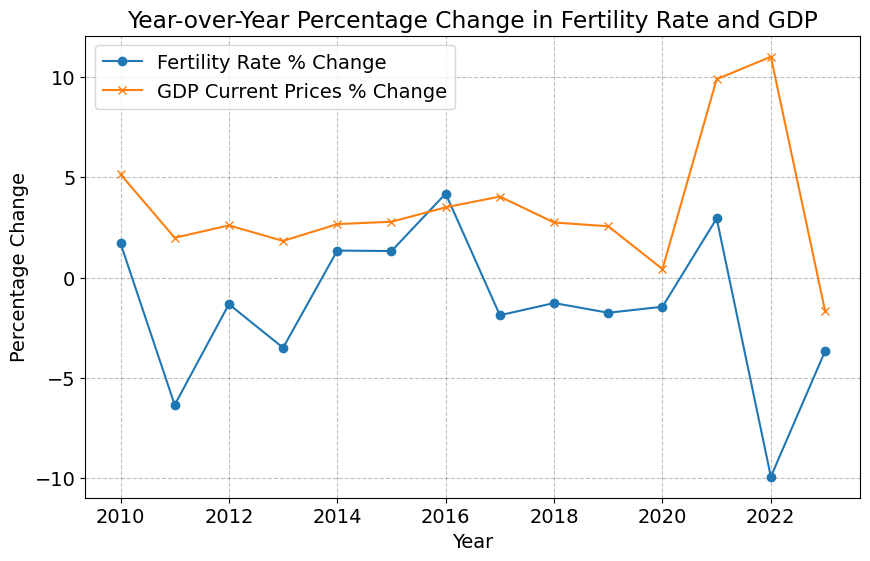

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['TID'], final_df['Fertility_Rate_Pct_Change'], label='Fertility Rate % Change', marker='o')
plt.plot(final_df['TID'], final_df['GDP_Current_Prices_Pct_Change'], label='GDP Current Prices % Change', marker='x')
plt.title('Year-over-Year Percentage Change in Fertility Rate and GDP')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.